In [6]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go

In [14]:
# Загрузка данных
daily_metrics = pd.read_csv('../data/processed/daily_metrics.csv')
product_metrics = pd.read_csv('../data/processed/product_metrics.csv')
seasonal_metrics = pd.read_csv('../data/processed/seasonal_metrics.csv')
price_metrics = pd.read_csv('../data/processed/price_metrics.csv')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

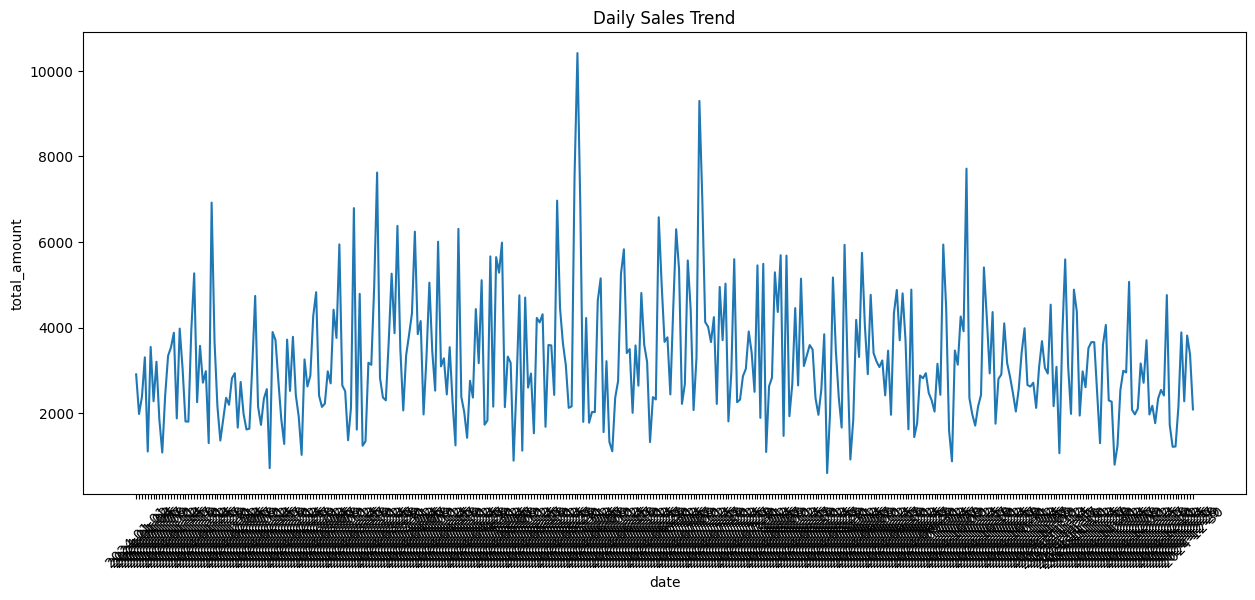

In [15]:
# 1. Временной анализ
## 1.1 Тренды продаж по времени
plt.figure(figsize=(15, 6))
sns.lineplot(data=daily_metrics, x='date', y='total_amount')
plt.title('Daily Sales Trend')
plt.xticks(rotation=45)

In [8]:
## 1.2 Сезонная декомпозиция
# Используем statsmodels для декомпозиции временного ряда

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Jeans'),
  Text(1, 0, 'Wide Leg Pants'),
  Text(2, 0, 'Casual Pants'),
  Text(3, 0, 'Business Trousers'),
  Text(4, 0, 'Cotton Shirt'),
  Text(5, 0, 'Formal Blouse'),
  Text(6, 0, 'Casual Top'),
  Text(7, 0, 'Silk Blouse'),
  Text(8, 0, 'Casual Maxi Dress')])

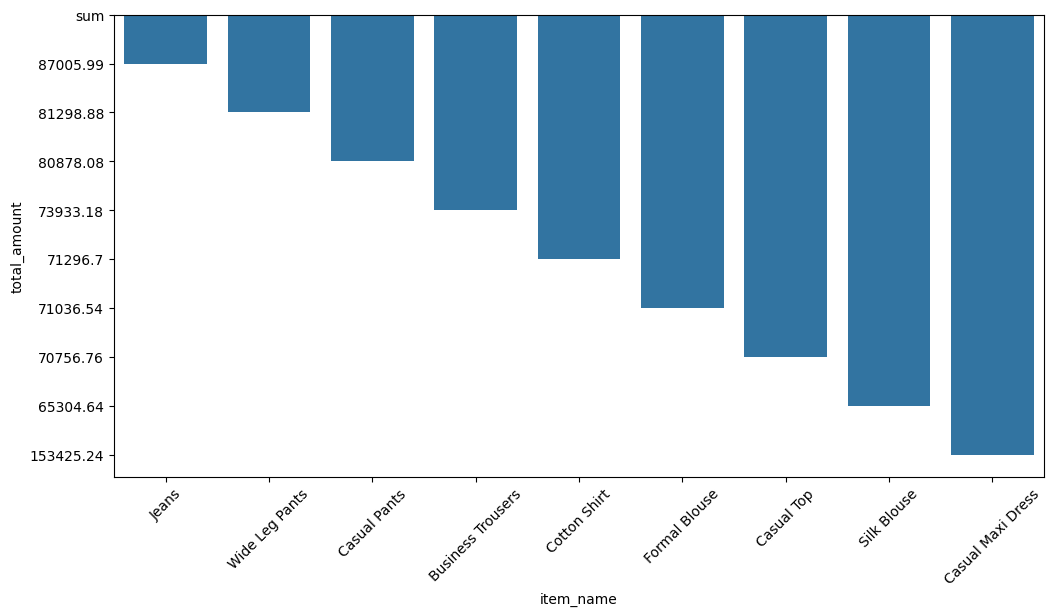

In [16]:
# 2. Анализ продуктов
## 2.1 Top-10 продуктов по продажам
product_top = product_metrics.sort_values('total_amount', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(data=product_top, x='item_name', y='total_amount')
plt.xticks(rotation=45)

Text(0, 0.5, 'Average Price')

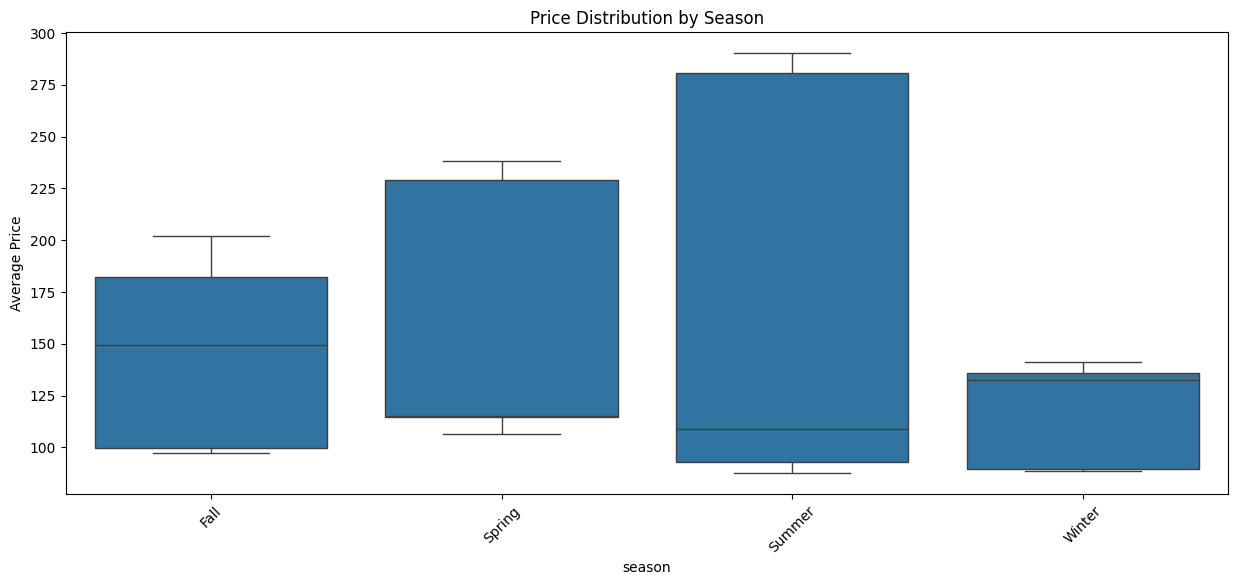

In [17]:
## 2.2.1. Анализ цен по сезонам
plt.figure(figsize=(15, 6))
sns.boxplot(data=price_metrics, x='season', y='price_mean')
plt.title('Price Distribution by Season')
plt.xticks(rotation=45)
plt.ylabel('Average Price')

Text(0.5, 0, 'Average Price')

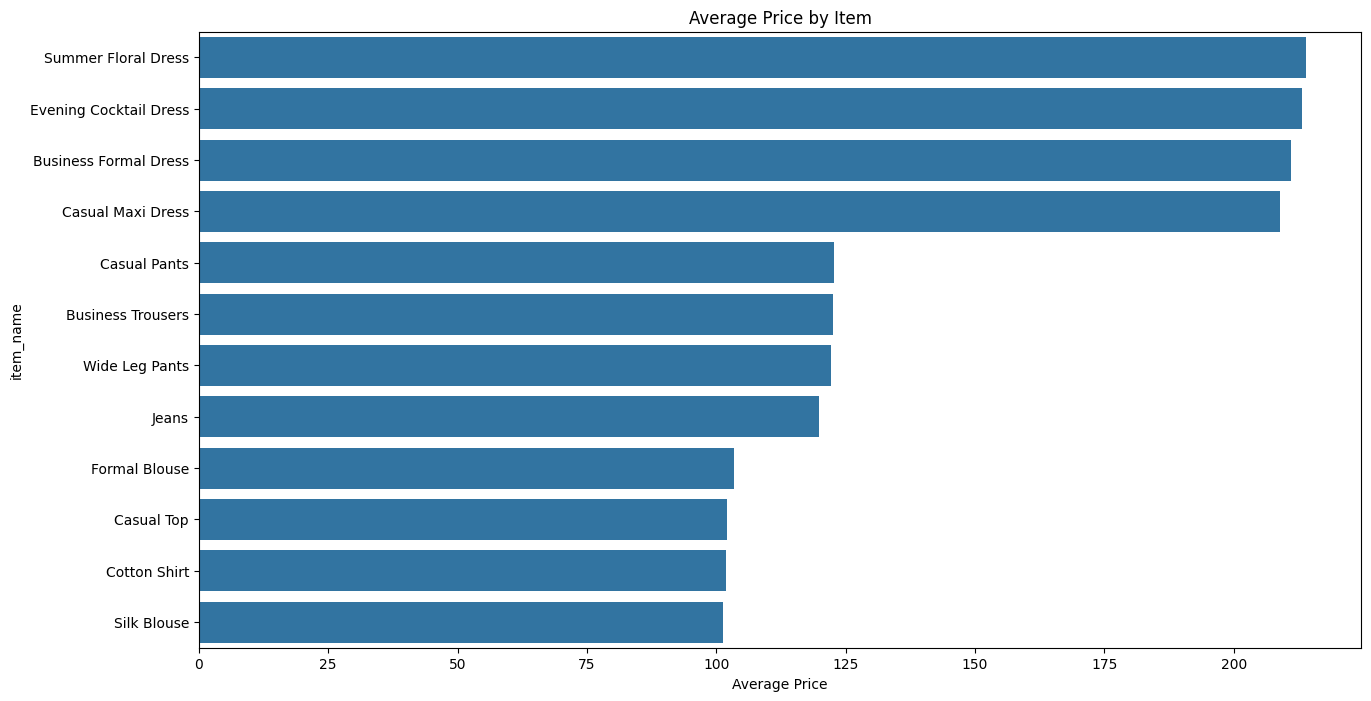

In [18]:
## 2.2.2.1 Средняя цена по товарам
plt.figure(figsize=(15, 8))
avg_price_by_item = price_metrics.groupby('item_name')['price_mean'].mean().sort_values(ascending=False)
sns.barplot(x=avg_price_by_item.values, y=avg_price_by_item.index)
plt.title('Average Price by Item')
plt.xlabel('Average Price')

Text(0.5, 0, 'Price Standard Deviation')

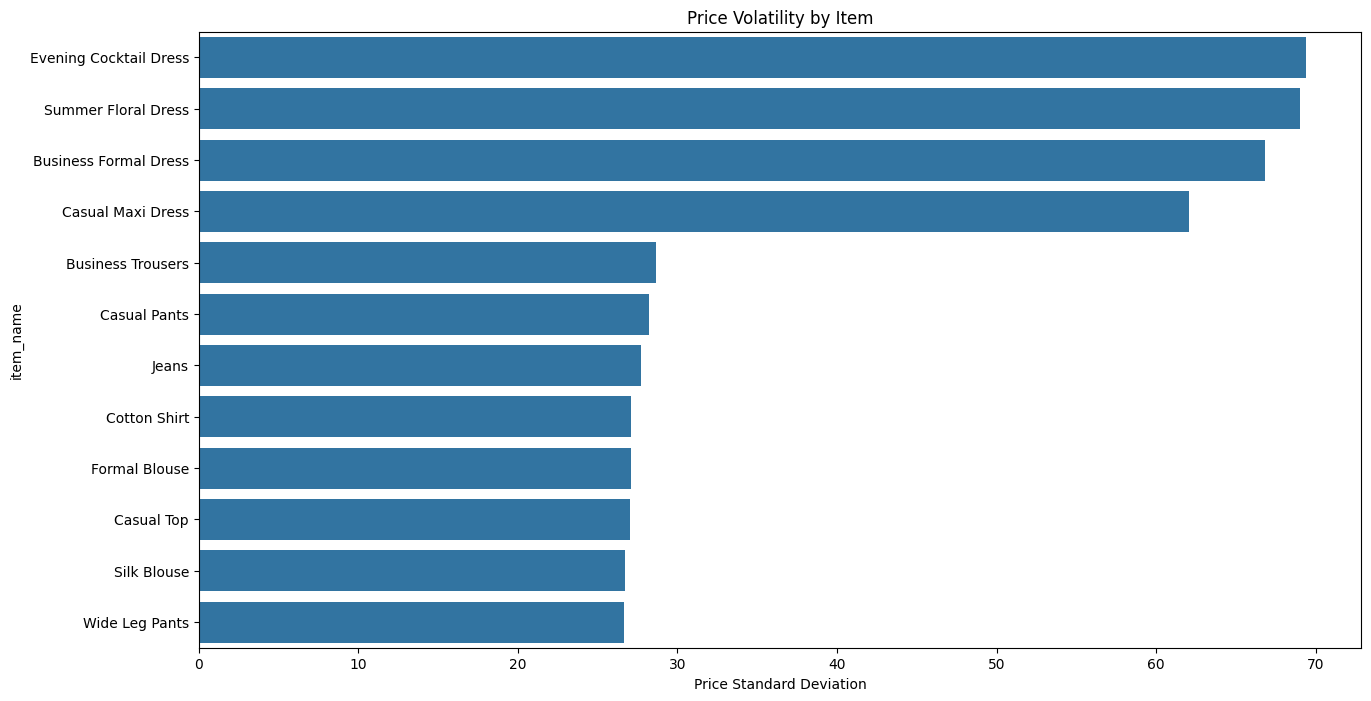

In [19]:
# 2.2.3. Анализ ценовой волатильности
plt.figure(figsize=(15, 8))
price_volatility = price_metrics.groupby('item_name')['price_std'].mean().sort_values(ascending=False)
sns.barplot(x=price_volatility.values, y=price_volatility.index)
plt.title('Price Volatility by Item')
plt.xlabel('Price Standard Deviation')

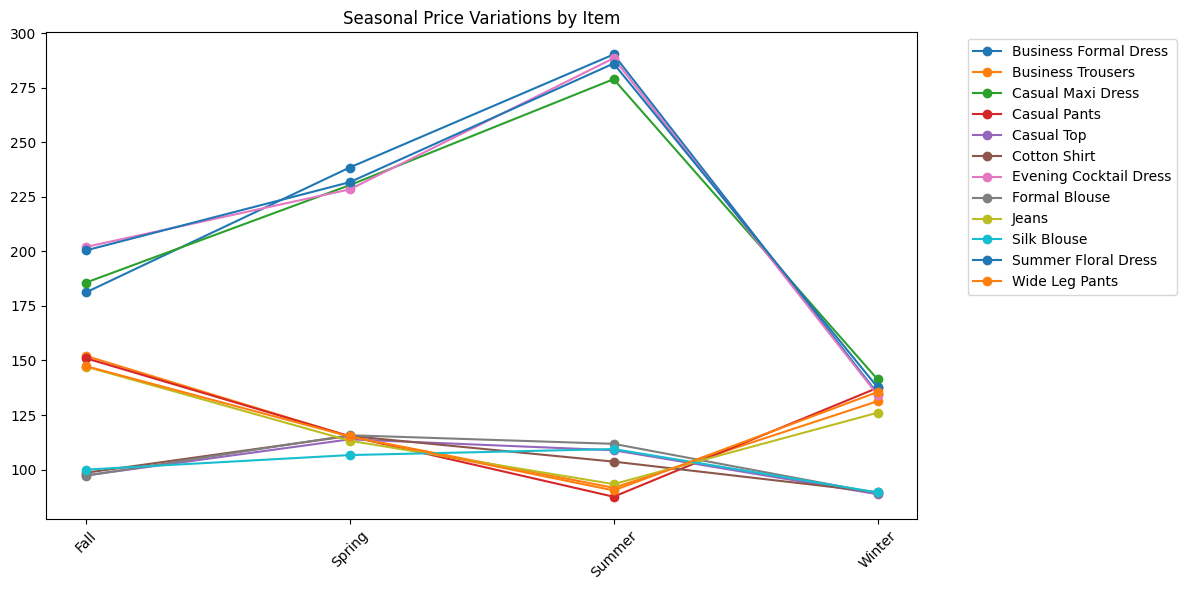

In [20]:
# 2.2.4. Сезонные колебания цен
plt.figure(figsize=(12, 6))
for item in price_metrics['item_name'].unique():
    item_data = price_metrics[price_metrics['item_name'] == item]
    plt.plot(item_data['season'], item_data['price_mean'], marker='o', label=item)
plt.title('Seasonal Price Variations by Item')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

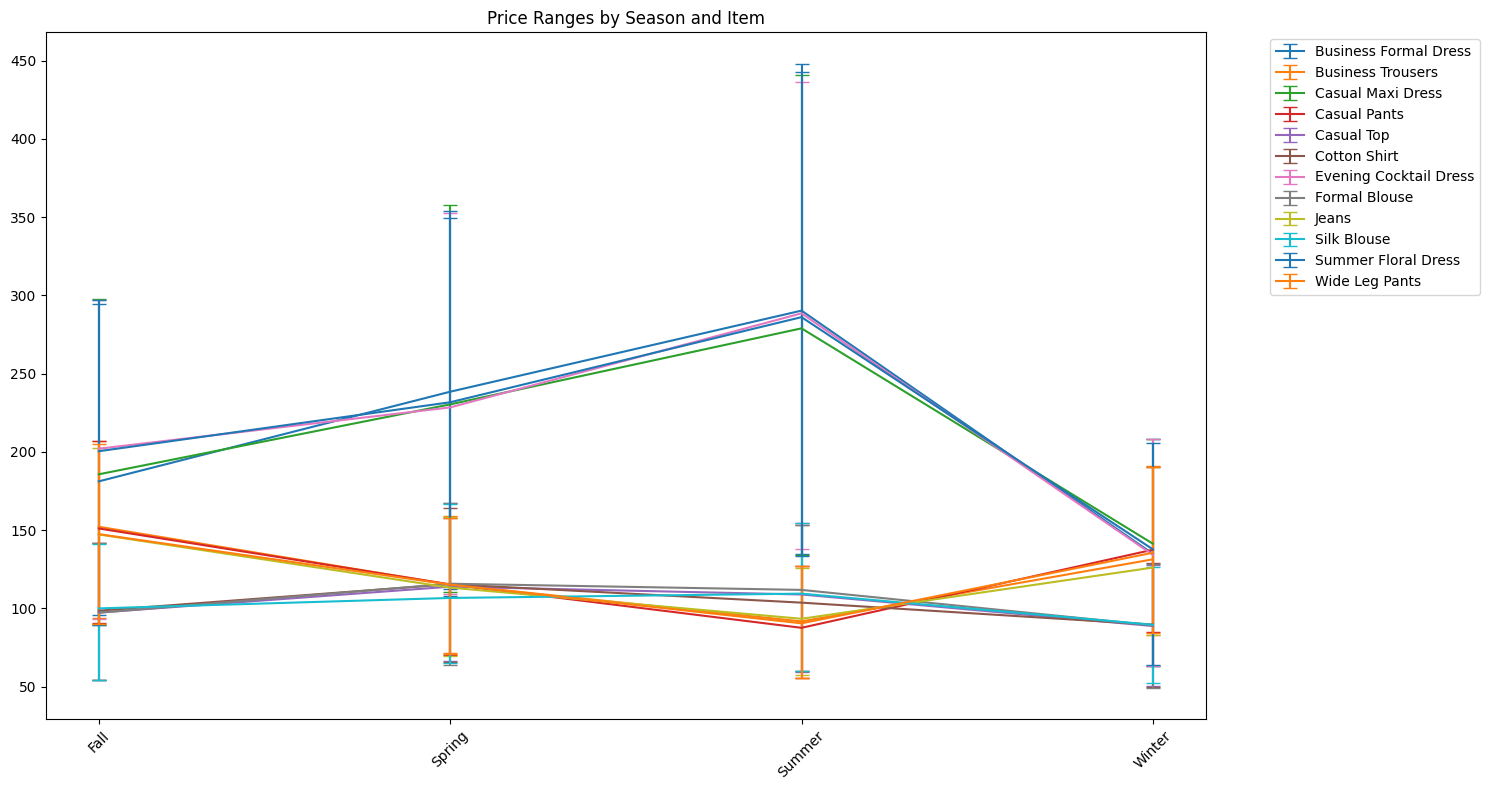

In [21]:
# 2.2.5. Анализ ценовых диапазонов
plt.figure(figsize=(15, 8))
for item in price_metrics['item_name'].unique():
    item_data = price_metrics[price_metrics['item_name'] == item]
    plt.errorbar(x=item_data['season'], 
                y=item_data['price_mean'],
                yerr=[item_data['price_mean'] - item_data['price_min'],
                      item_data['price_max'] - item_data['price_mean']],
                label=item,
                capsize=5)
plt.title('Price Ranges by Season and Item')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

<Axes: xlabel='season', ylabel='total_amount'>

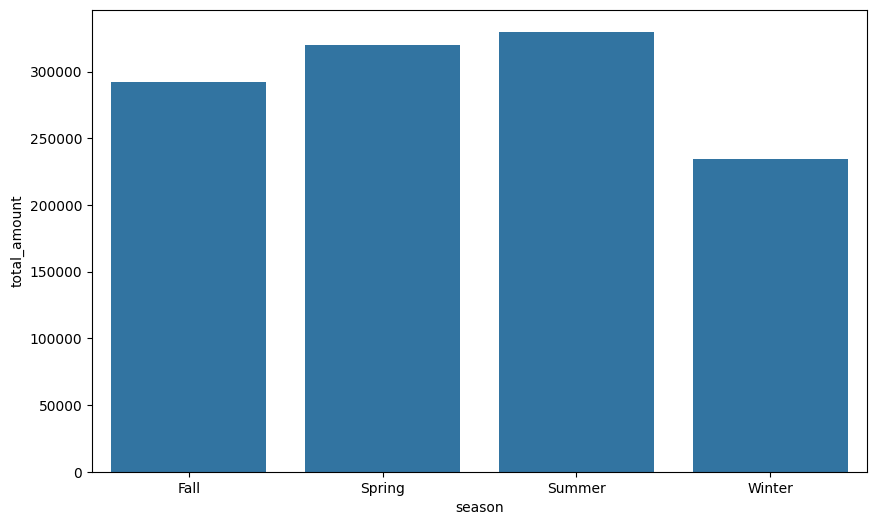

In [22]:
# 3. Сезонный анализ
## 3.1 Продажи по сезонам
plt.figure(figsize=(10, 6))
sns.barplot(data=seasonal_metrics, x='season', y='total_amount')

In [24]:
## 3.2 Средний чек по сезонам
seasonal_avg = seasonal_metrics['total_amount'] / seasonal_metrics['quantity']
print(seasonal_avg)

0    148.568433
1    151.088611
2    163.321020
3    120.545226
dtype: float64


<Axes: >

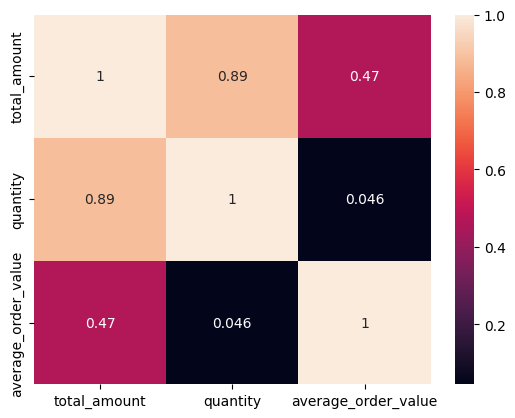

In [25]:
# 4. Корреляционный анализ
## 4.1 Корреляция между ценой и количеством продаж
correlation_matrix = daily_metrics[['total_amount', 'quantity', 'average_order_value']].corr()
sns.heatmap(correlation_matrix, annot=True)

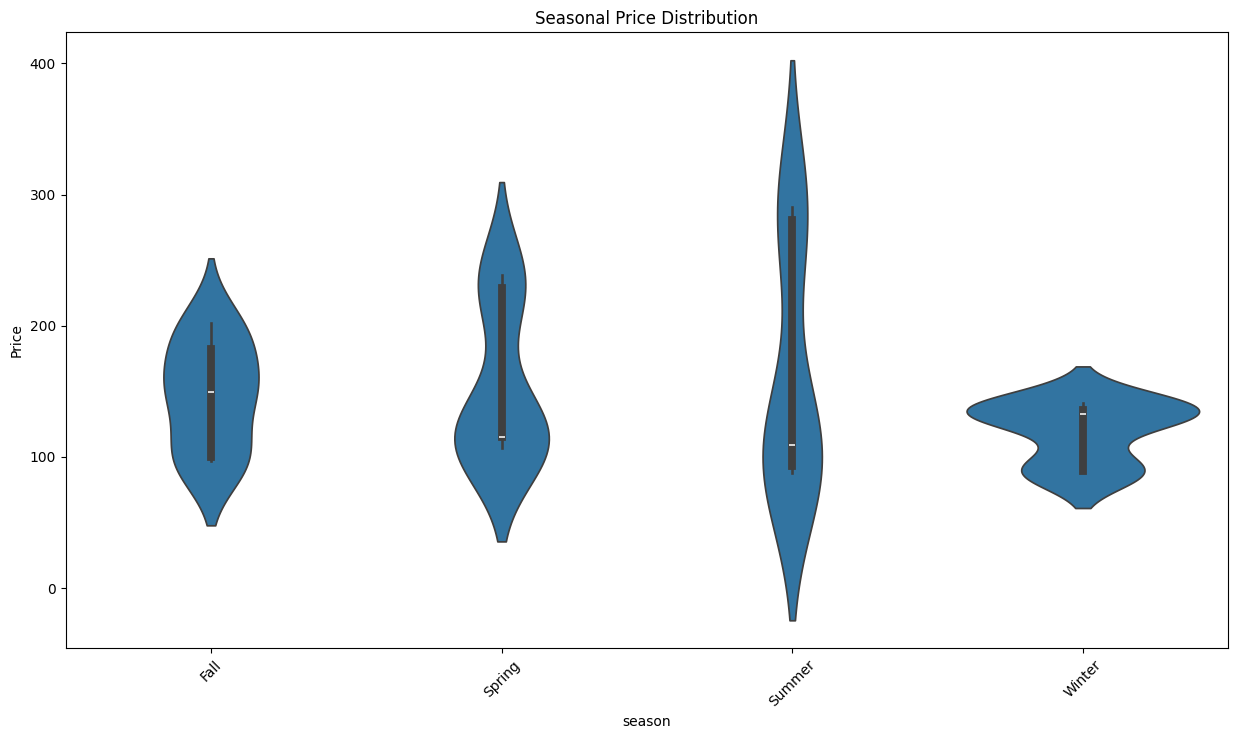

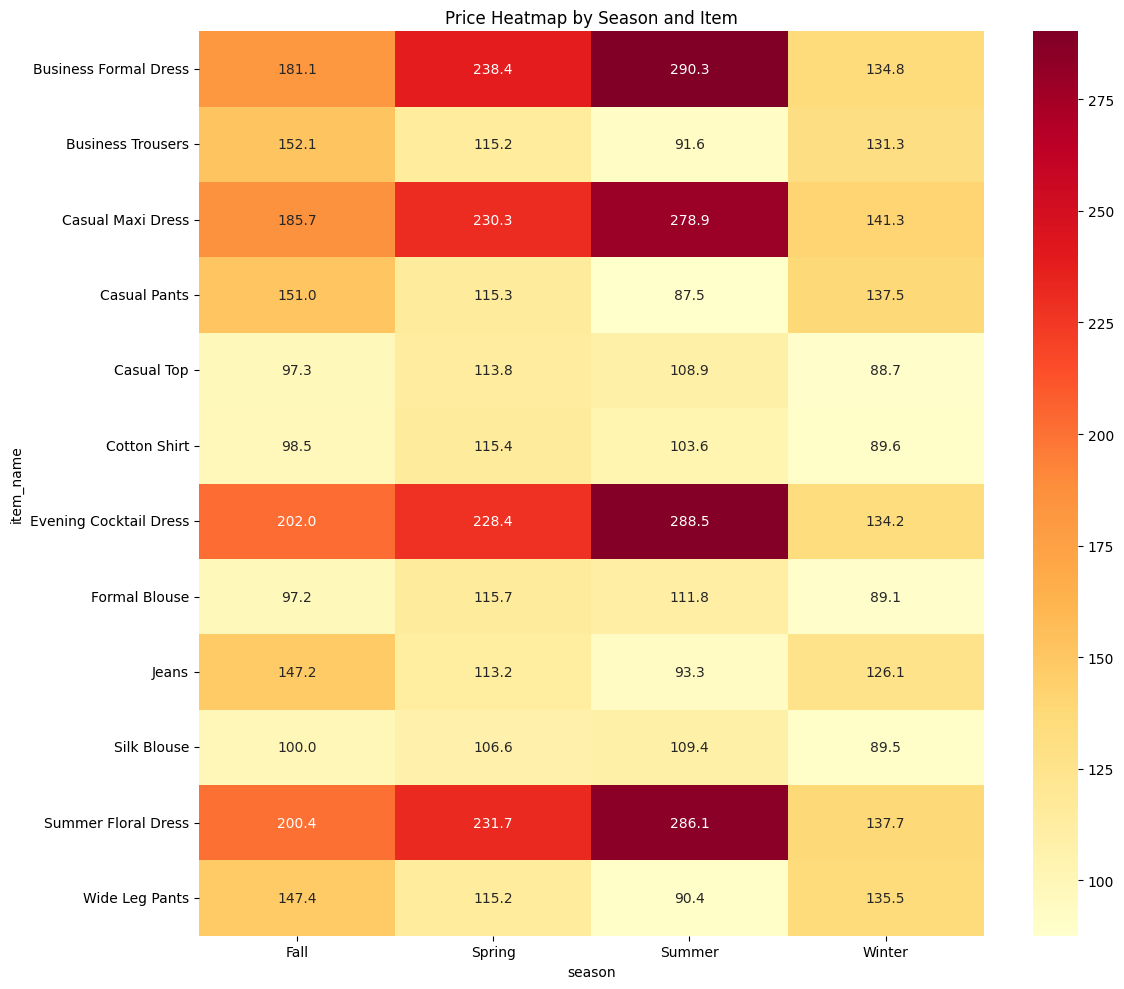

In [26]:
# Сезонные паттерны цен
plt.figure(figsize=(15, 8))
sns.violinplot(data=price_metrics, x='season', y='price_mean')
plt.title('Seasonal Price Distribution')
plt.xticks(rotation=45)
plt.ylabel('Price')

# Добавим тепловую карту сезонных цен
seasonal_pivot = price_metrics.pivot_table(
    values='price_mean', 
    index='item_name', 
    columns='season'
)

plt.figure(figsize=(12, 10))
sns.heatmap(seasonal_pivot, annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('Price Heatmap by Season and Item')
plt.tight_layout()

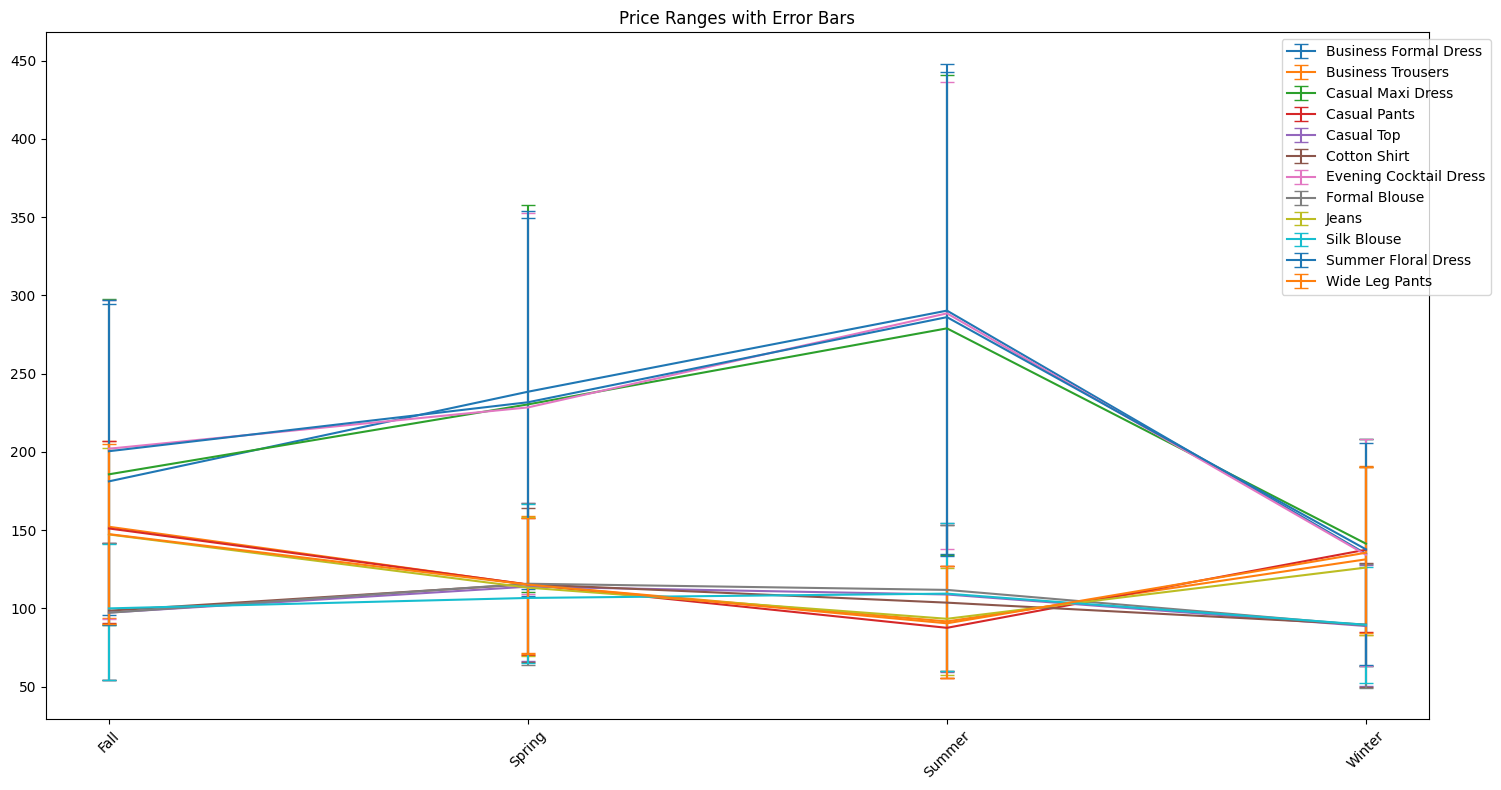

In [27]:
# Ценовые диапазоны по категориям
plt.figure(figsize=(15, 8))
for item in price_metrics['item_name'].unique():
    item_data = price_metrics[price_metrics['item_name'] == item]
    plt.errorbar(
        x=item_data['season'],
        y=item_data['price_mean'],
        yerr=[
            item_data['price_mean'] - item_data['price_min'],
            item_data['price_max'] - item_data['price_mean']
        ],
        label=item,
        capsize=5
    )
plt.title('Price Ranges with Error Bars')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()


In [28]:
# Статистический анализ цен
price_stats = price_metrics.groupby('item_name').agg({
    'price_mean': ['mean', 'std'],
    'price_min': 'min',
    'price_max': 'max',
    'price_median': 'mean'
}).round(2)

price_stats.columns = ['avg_price', 'price_std', 'min_price', 'max_price', 'median_price']
price_stats['coefficient_of_variation'] = (price_stats['price_std'] / price_stats['avg_price'] * 100).round(2)
price_stats = price_stats.sort_values('coefficient_of_variation', ascending=False)

print("Статистический анализ цен:")
print(price_stats)

Статистический анализ цен:
                        avg_price  price_std  min_price  max_price  \
item_name                                                            
Business Formal Dress      211.17      67.63      63.24     442.87   
Evening Cocktail Dress     213.28      63.95      62.88     436.32   
Summer Floral Dress        213.97      61.96      64.08     448.15   
Casual Maxi Dress          209.06      59.08      63.32     441.09   
Casual Pants               122.83      27.76      55.22     206.66   
Business Trousers          122.56      25.58      55.59     206.63   
Wide Leg Pants             122.13      24.98      55.30     204.98   
Jeans                      119.96      22.62      57.54     202.66   
Formal Blouse              103.46      12.44      49.33     167.45   
Casual Top                 102.17      11.35      50.46     167.47   
Cotton Shirt               101.80      10.77      49.65     164.06   
Silk Blouse                101.38       8.85      52.49     166

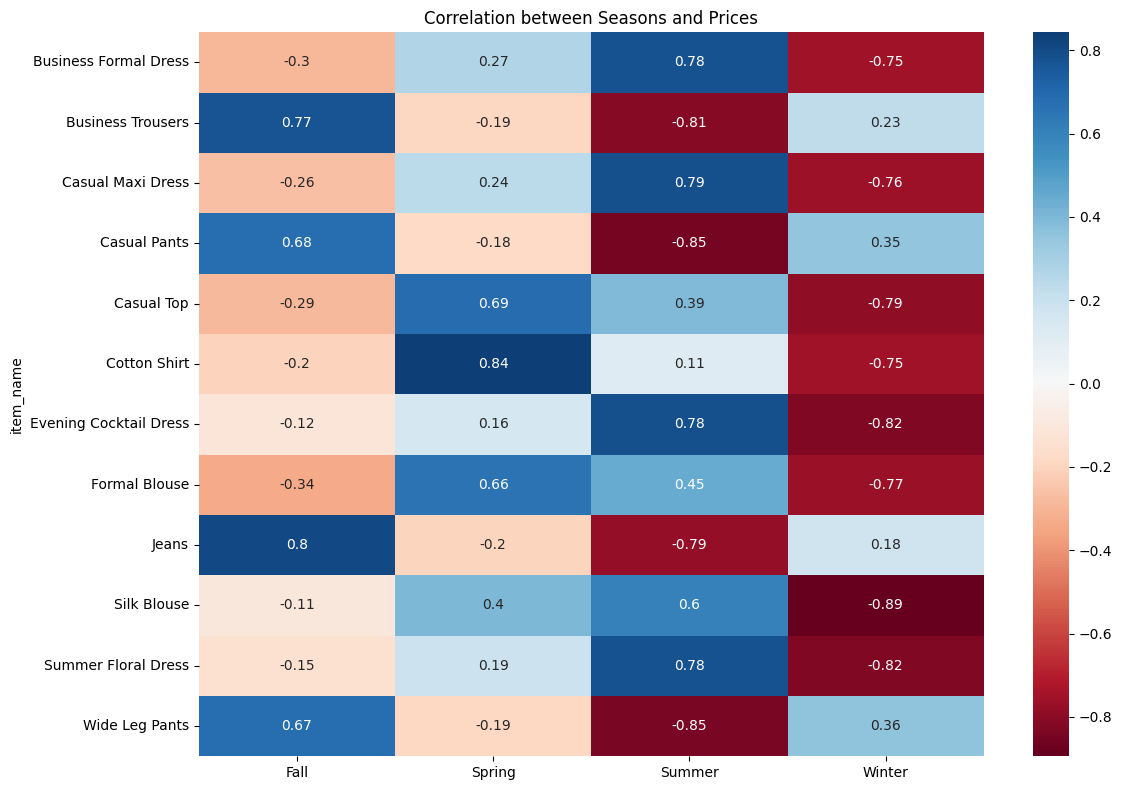

In [29]:
# Создадим dummy-переменные для сезонов
season_dummies = pd.get_dummies(price_metrics['season'])
price_with_dummies = pd.concat([
    price_metrics[['item_name', 'price_mean']], 
    season_dummies
], axis=1)

correlation = price_with_dummies.groupby('item_name').corr()['price_mean'].unstack()
correlation = correlation.drop('price_mean', axis=1)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='RdBu', center=0)
plt.title('Correlation between Seasons and Prices')
plt.tight_layout()


### Ключевые выводы из анализа:

1. Сезонные паттерны:

- Летние цены значительно выше для большинства товаров
- Зимние цены показывают наименьшие значения
- Наибольшая сезонная вариация у платьев

2. Ценовая стратегия:

- Business Formal Dress и Evening Cocktail Dress - премиум сегмент
- Casual Top и Cotton Shirt - базовый сегмент
- Наибольшая ценовая волатильность у платьев

3. Рекомендации:

- Внедрить динамическое ценообразование с учетом сезонности
- Оптимизировать запасы с учетом сезонных колебаний цен
- Разработать специальные предложения для межсезонья